In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import sys 
sys.path.append('.')

from cgiar.utils import get_dir

In [2]:
data_dir = get_dir('data/')
artifacts = get_dir('solutions/v5/#2/')

In [3]:
df = pd.read_csv(artifacts / "train_predictions.csv")

In [4]:

def load_image(id):
    filename = df[df['ID'] == id]['filename'].values[0]
    img = Image.open(data_dir / 'train' / f'{filename}')
    return img

In [5]:
# Calculate basic statistics
df.describe()

,extent,predicted_extent
count,26068.000000,26068.000000
mean,7.096056,8.245728
std,18.613229,20.979750
min,0.000000,-0.227763
25%,0.000000,0.324975
50%,0.000000,0.559993
75%,0.000000,1.136679
max,100.000000,127.675064


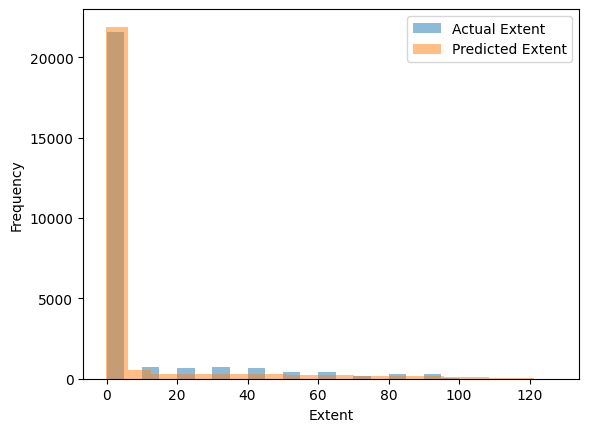

In [6]:
# Histogram
plt.hist(df['extent'], bins=20, alpha=0.5, label='Actual Extent')
plt.hist(df['predicted_extent'], bins=20, alpha=0.5, label='Predicted Extent')
plt.xlabel('Extent')
plt.ylabel('Frequency')
plt.legend()
plt.show()

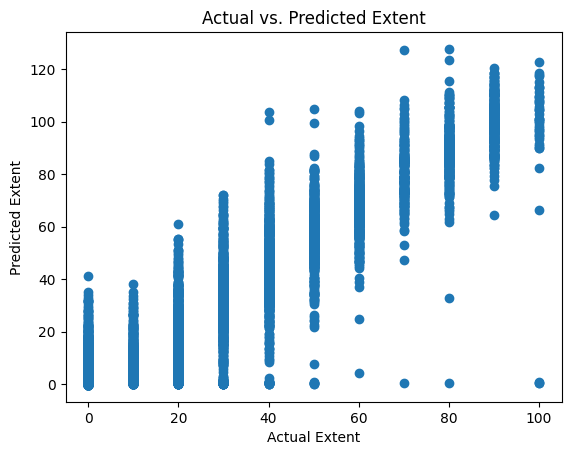

In [7]:
# Scatter Plot
plt.scatter(df['extent'], df['predicted_extent'])
plt.xlabel('Actual Extent')
plt.ylabel('Predicted Extent')
plt.title('Actual vs. Predicted Extent')
plt.show()

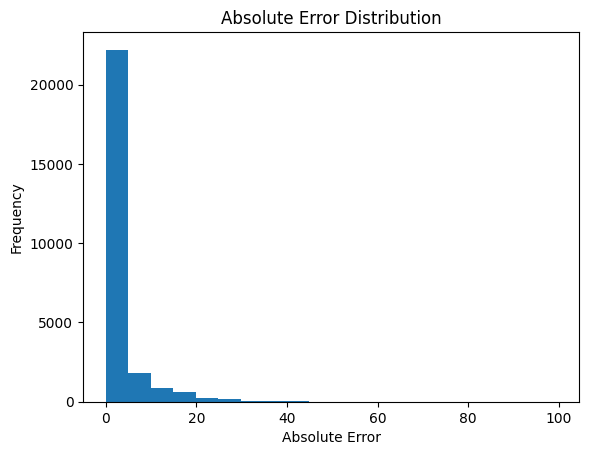

In [8]:
# Calculate absolute error
df['abs_error'] = abs(df['extent'] - df['predicted_extent'])

# Visualize error distribution
plt.hist(df['abs_error'], bins=20)
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Absolute Error Distribution')
plt.show()



,ID,filename,extent,predicted_extent,abs_error
13404,ID_GG2JIWT6MQ,L428F02948C39S14228Dp49341.jpg,100,0.490635,99.509365
962,ID_HBM4U3PMW8,L428F02948C39S14228Dp49337.jpg,100,0.627359,99.372641
2546,ID_NAMA16UEVE,L373F01910C42S14562Rp49142.jpg,100,0.991380,99.008620
15921,ID_GSPMLJ8B9N,L376F03184C01S07684Rp29874.jpg,80,0.548108,79.451892
10407,ID_WAI3Z9QO5Z,L1095F00653C39S13988Dp38319.jpg,70,0.690946,69.309054
4561,ID_WLTECUII6M,28_repeat_2_1041_5419_3800.JPG,40,103.662201,63.662201
2737,ID_AGFBKWXXUL,L405F05543C39S14199Rp49290.jpg,40,100.791153,60.791153
2578,ID_M05RWHBJHG,L231F01717C03S07853Rp29066.jpg,70,127.300827,57.300827
11557,ID_8YQAI2I2JF,L231F00243C41S12142Rp49014.jpg,60,4.135417,55.864583
18282,ID_ADX51XFNFK,L325F00154C39S12251Rp48677.jpg,50,104.745659,54.745659


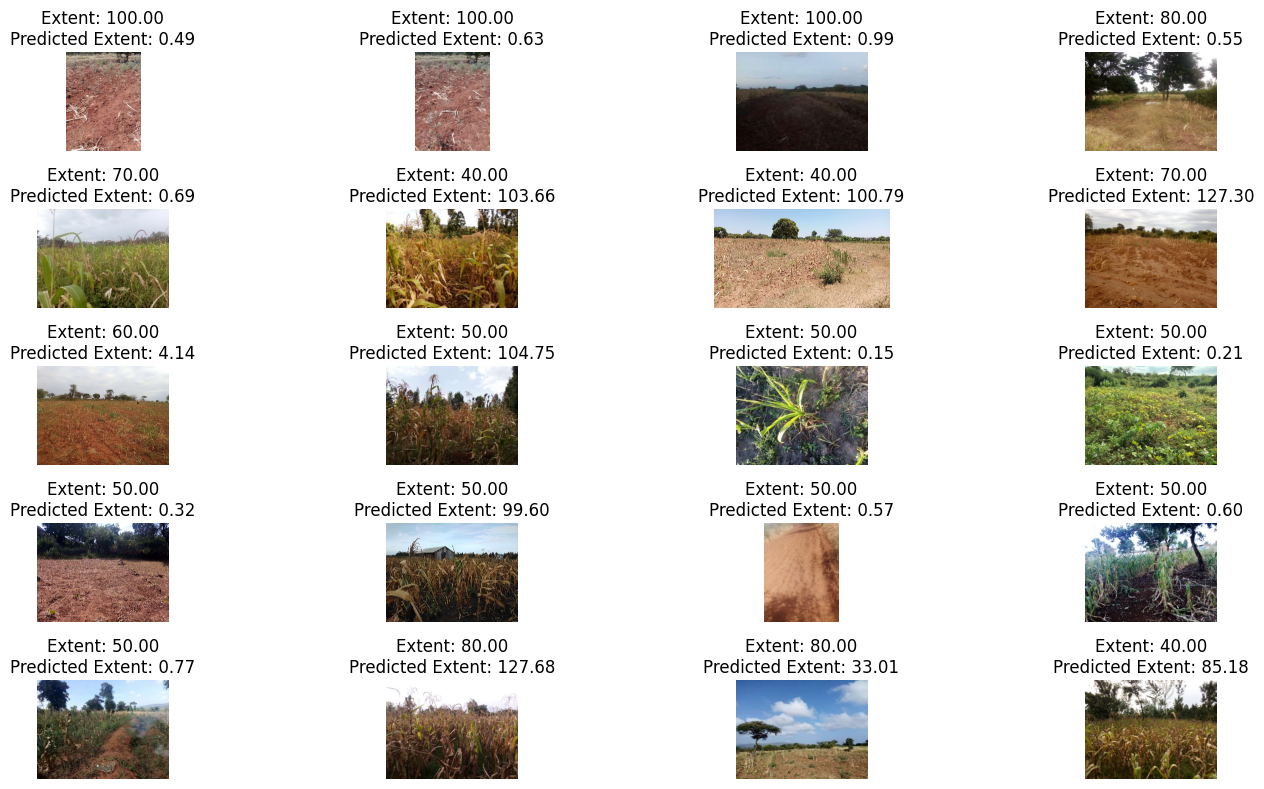

In [15]:
# Display cases with highest errors
num_top_errors = 20
top_error_cases = df.nlargest(num_top_errors, 'abs_error')
display(top_error_cases[['ID', 'filename', 'extent', 'predicted_extent', 'abs_error']])

# Create subplots
fig, axes = plt.subplots(num_top_errors // 4, 4, figsize=(15, 8))
axes = axes.ravel()

i = 0
for _, row in top_error_cases.iterrows():
    img_id = row['ID']
    extent = row['extent']
    growth_stage = row['growth_stage']
    
    predicted_extent = row['predicted_extent']
    
    # Load and display the image
    img = load_image(img_id)
    
    # Display the image with title containing extent and predicted extent
    axes[i].imshow(img)
    axes[i].set_title(f'Extent: {extent:.2f}\nPredicted Extent: {predicted_extent:.2f}')
    axes[i].axis('off')
  
    i += 1

# Adjust subplot layout
plt.tight_layout()
plt.show()

,ID,filename,extent,predicted_extent,abs_error
19024,ID_272UD023MN,154_repeat_2_1580_5581_3919.JPG,90,99.973442,9.973442
12542,ID_AU9MT5W2FC,L133F03263C39S14041Rp48124.jpg,90,99.972054,9.972054
16278,ID_EBQFFWZQNZ,L427F02407C42S15042Rp47238.jpg,70,100.115997,30.115997
6107,ID_MUKCN7FB7N,L144F01764C01S01724Rp13859.jpg,90,100.139755,10.139755
14265,ID_3HGEK0QFIA,L134F04023C01S02591Rp14649.jpg,90,100.141350,10.141350
19366,ID_62ZMHLATWH,L221F01487C01S03310Rp14303.jpg,80,100.203499,20.203499
10970,ID_I26MTTK5SK,L242F01471C03S08179Rp27389.jpg,80,100.213264,20.213264
5241,ID_0P4D9DM77H,L406F00126C39S12385Ip.jpg,100,100.231384,0.231384
20485,ID_8YJOMULHCP,L133F03567C39S14739Rp48967.jpg,100,100.250092,0.250092
3322,ID_U45E5M535A,L1084F03198C01S00078Rp08446.jpg,90,100.250961,10.250961


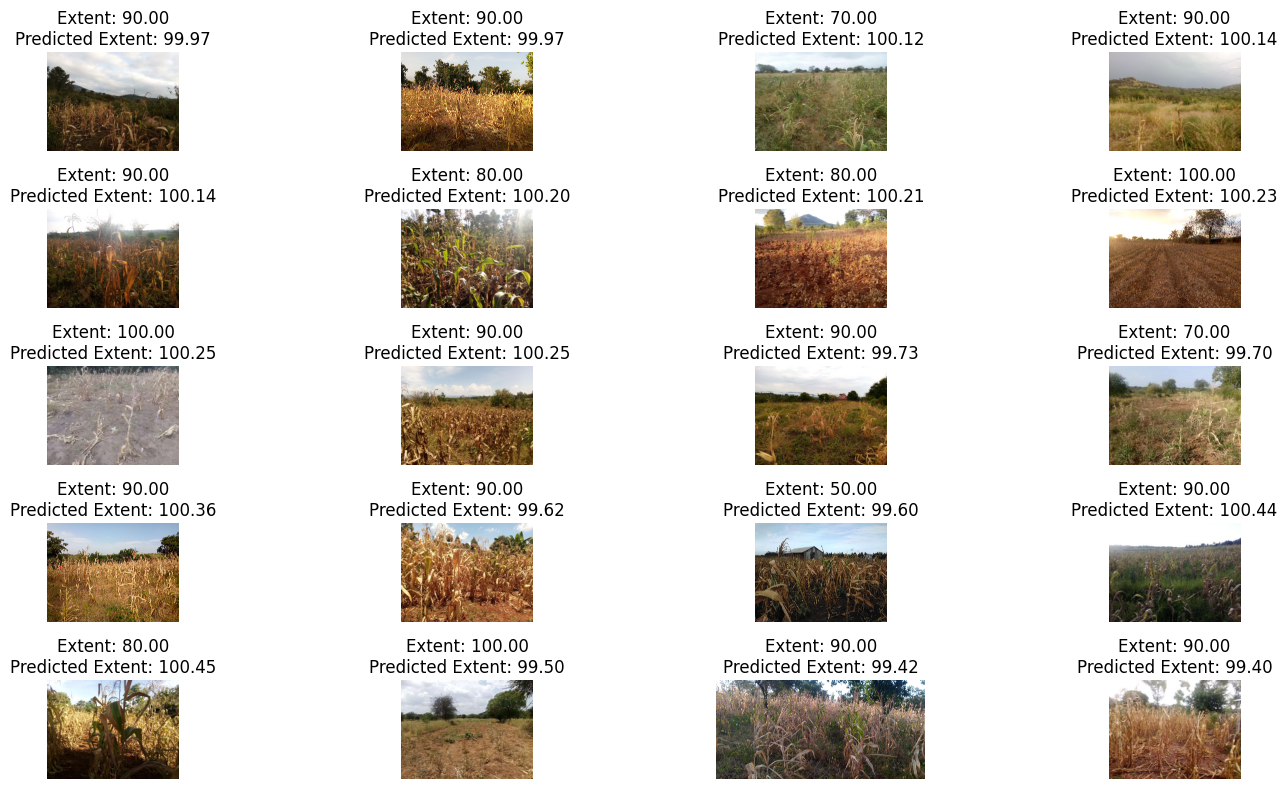

In [18]:
num_top_to_100=20

# print imageS where the predicted extent is the closest to 100
closest_to_100 = df.iloc[(df['predicted_extent']-100).abs().argsort()[:num_top_to_100]]
display(closest_to_100[['ID', 'filename', 'extent', 'predicted_extent', 'abs_error']])

# Create subplots
fig, axes = plt.subplots(num_top_to_100 // 4, 4, figsize=(15, 8))
axes = axes.ravel()

i = 0
for _, row in closest_to_100.iterrows():
    img_id = row['ID']
    extent = row['extent']
    predicted_extent = row['predicted_extent']
    
    # Load and display the image
    img = load_image(img_id)
    
    # Display the image with title containing extent and predicted extent
    axes[i].imshow(img)
    axes[i].set_title(f'Extent: {extent:.2f}\nPredicted Extent: {predicted_extent:.2f}')
    axes[i].axis('off')
  
    i += 1

# Adjust subplot layout
plt.tight_layout()
plt.show()

,ID,filename,extent,predicted_extent,abs_error
7913,ID_NCO4VTGM6P,L342F02619C39S14265Rp43271.jpg,0,-0.000416,0.000416
151,ID_8OES47CQPL,L361F00187C39S14462Rp34387.jpg,0,0.000444,0.000444
20946,ID_G8J8C9G5M9,L1094F01822C39S11674Rp32610.jpg,0,-0.000516,0.000516
23536,ID_8SPINQA5MC,L355F02277C41S14535Ip.jpg,0,0.000680,0.000680
17306,ID_IL0U49E5BH,L361F03428C01S04910Ip.jpg,0,0.001084,0.001084
13378,ID_GW8UGSNU5I,L122F01599C01S02648Rp01154.jpg,0,0.001207,0.001207
24986,ID_34D9KWTT74,L1125F01128C39S14471Ip.jpg,0,-0.001258,0.001258
6720,ID_VB4U137QDK,L121F00588C01S08468Rp17497.jpg,0,-0.001259,0.001259
2194,ID_HE3WTFIDZ0,L323F00907C01S00309Rp05638.jpg,0,-0.001710,0.001710
10110,ID_NNWV440R4B,L331F04183C39S12632Rp36584.jpg,0,0.001753,0.001753


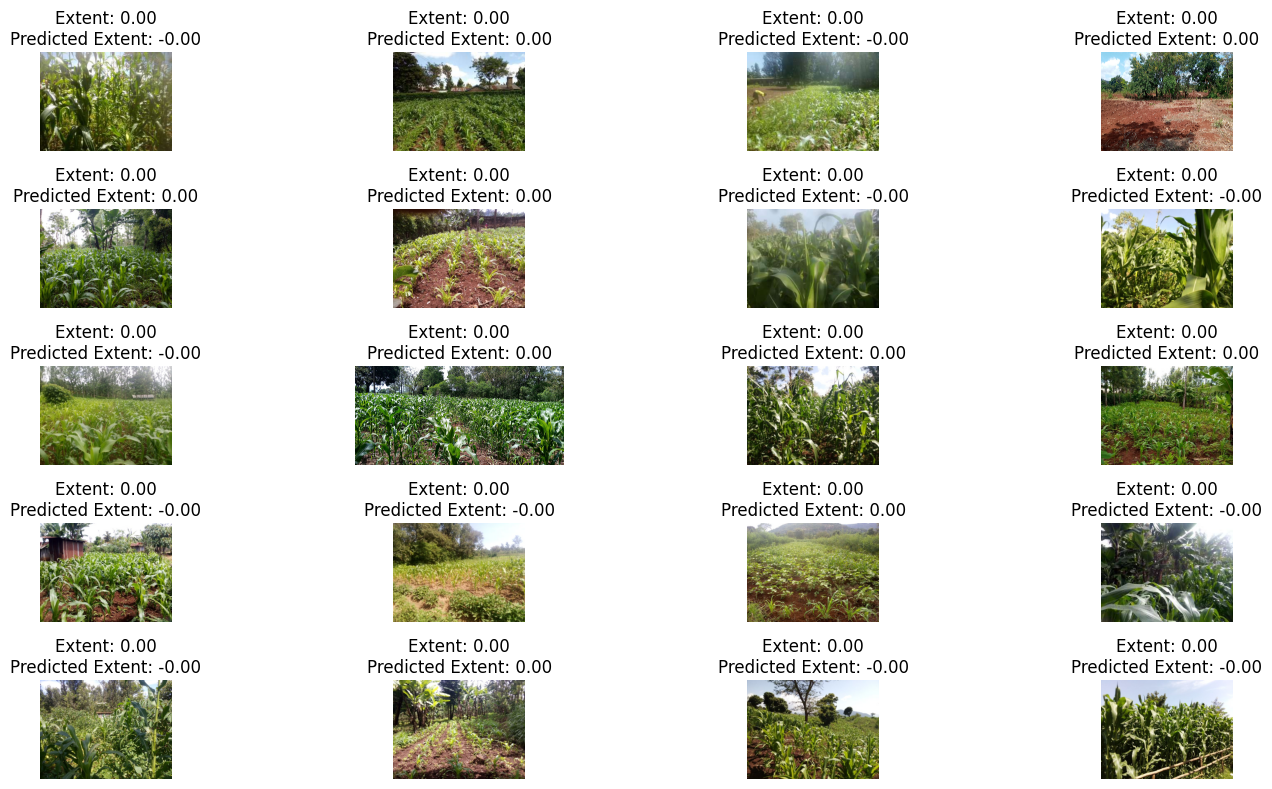

In [19]:
num_top_to_0=20

# print images where the predicted extent is the closest to 0
closest_to_0 = df.iloc[(df['predicted_extent']-0).abs().argsort()[:num_top_to_100]]
display(closest_to_0[['ID', 'filename', 'extent', 'predicted_extent', 'abs_error']])

# Create subplots
fig, axes = plt.subplots(num_top_to_100 // 4, 4, figsize=(15, 8))
axes = axes.ravel()

i = 0
for _, row in closest_to_0.iterrows():
    img_id = row['ID']
    extent = row['extent']
    predicted_extent = row['predicted_extent']
    
    # Load and display the image
    img = load_image(img_id)
    
    # Display the image with title containing extent and predicted extent
    axes[i].imshow(img)
    axes[i].set_title(f'Extent: {extent:.2f}\nPredicted Extent: {predicted_extent:.2f}')
    axes[i].axis('off')
  
    i += 1

# Adjust subplot layout
plt.tight_layout()
plt.show()

In [11]:
# Calculate Pearson's correlation coefficient
correlation_coefficient = df['extent'].corr(df['predicted_extent'])
print(f'Correlation Coefficient: {correlation_coefficient}')

Correlation Coefficient: 0.9609701341643072


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(df['extent'], df['predicted_extent'])
mse = mean_squared_error(df['extent'], df['predicted_extent'])
rmse = mean_squared_error(df['extent'], df['predicted_extent'], squared=False)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 2.600142238352647
MSE: 37.40317629074601
RMSE: 6.115813624592072


In [13]:
df['error'] = abs(df['extent'] - df['predicted_extent'])
error_by_growth_stage = df.groupby('growth_stage')['error'].mean().reset_index()
display(error_by_growth_stage)

,growth_stage,error
0,F,2.175802
1,M,5.899350
2,S,1.257061
3,V,1.098510


In [14]:
error_by_growth_stage = df.groupby('season')['error'].mean().reset_index()
display(error_by_growth_stage)

,season,error
0,LR2020,2.810905
1,LR2021,2.694147
2,SR2020,2.709365
3,SR2021,2.413934
